<a href="https://colab.research.google.com/github/LavanyaPobbathi/Lavanya_INFO5731_Fall2023/blob/main/In_class_exercise/Lavanya_Pobbathi_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [3]:
# Write your code here

#installing selenium package
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.0 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,278 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,473 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugi

In [32]:
import warnings

# Suppress warnings issued by a specific module
warnings.filterwarnings("ignore", category=UserWarning, module="frame.copy()")
#find_module()
# Suppress all warnings (use with caution)
warnings.filterwarnings("ignore")

# Restore default behavior
warnings.filterwarnings("default")


In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**importing required packages**

In [20]:
# Importing necessary modules from the Selenium library
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By

# Importing pandas for data manipulation
import pandas as pd

# Importing the time module
import time

# Setting up ChromeOptions to configure the Chrome WebDriver
options = webdriver.ChromeOptions()

# Setting the headless mode, which allows running the browser without a GUI
options.add_argument('-headless')

# Disabling the sandbox mode for added security
options.add_argument('-no-sandbox')

# Disabling the /dev/shm usage to avoid WebDriver failures in certain environments
options.add_argument('-disable-dev-shm-usage')
reviews=pd.read_csv('imdb_reviews.csv')
print(reviews)

                                                Review
0    I have trouble turning off my brain. Anxieties...
1    Profoundly deep, genuinely moving, utterly hil...
2    If you take drugs for the first time and imagi...
3    "Be kind, especially when you don't know what'...
4    Everything Everywhere All At Once is even craz...
..                                                 ...
170  After the first 30 minutes that promised an in...
171  No one liked my indy review, so they're really...
172  All of the instalments in this franchise are v...
173  There are no major spoilers but some minor plo...
174  Tom Cruise amazing as usual. The action scenes...

[175 rows x 1 columns]


In [24]:
# Print the column names to identify the correct one
print(reviews.columns)

# 1 Lower Case
reviews['After Converting to lower case'] = reviews['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# 2 Punctuation Removal
reviews['After Removing Punctuation'] = reviews['After Converting to lower case'].str.replace('[^\w\s]', '', regex=True)

# 3 Special Characters Removal
import re
reviews['After Removing Special Characters'] = reviews['After Removing Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', char) for char in x))

# 4 Stopwords Removal
from nltk.corpus import stopwords
stop = stopwords.words('english')
reviews['After Removing Stopwords'] = reviews['After Removing Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# 5 Spelling Correction
from textblob import TextBlob
reviews['After Spelling Correction'] = reviews['After Removing Stopwords'].apply(lambda x: str(TextBlob(x).correct()))

# 6 Tokenization
import nltk
nltk.download('punkt')
reviews['After Tokenization'] = reviews['After Spelling Correction'].apply(lambda x: TextBlob(x).words)

# 7 Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
reviews['After Stemming'] = reviews['After Tokenization'].apply(lambda x: " ".join([ps.stem(word) for word in x]))

# 8 Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')
reviews['After Lemmatization'] = reviews['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

reviews.to_csv('reviews_Final.csv', index=False)
reviews

<>:8: DeprecationWarning: invalid escape sequence '\w'
<>:8: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-24-e3a28180e104>:8: DeprecationWarning: invalid escape sequence '\w'
  reviews['After Removing Punctuation'] = reviews['After Converting to lower case'].str.replace('[^\w\s]', '', regex=True)


Index(['Review', 'After Converting to lower case',
       'After Removing Punctuation', 'After Removing Special Characters',
       'After Removing Stopwords'],
      dtype='object')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


,Review,After Converting to lower case,After Removing Punctuation,After Removing Special Characters,After Removing Stopwords,After Spelling Correction,After Tokenization,After Stemming,After Lemmatization
0,I have trouble turning off my brain. Anxieties...,i have trouble turning off my brain. anxieties...,i have trouble turning off my brain anxieties ...,i have trouble turning off my brain anxieties ...,trouble turning brain anxieties worries mundan...,trouble turning brain anxieties worries mundan...,"[trouble, turning, brain, anxieties, worries, ...",troubl turn brain anxieti worri mundan took ev...,troubl turn brain anxieti worri mundan took ev...
1,"Profoundly deep, genuinely moving, utterly hil...","profoundly deep, genuinely moving, utterly hil...",profoundly deep genuinely moving utterly hilar...,profoundly deep genuinely moving utterly hilar...,profoundly deep genuinely moving utterly hilar...,profoundly deep genuinely moving utterly hilar...,"[profoundly, deep, genuinely, moving, utterly,...",profoundli deep genuin move utterli hilari hig...,profoundli deep genuin move utterli hilari hig...
2,If you take drugs for the first time and imagi...,if you take drugs for the first time and imagi...,if you take drugs for the first time and imagi...,if you take drugs for the first time and imagi...,take drugs first time imagined jackie chan fem...,take drugs first time imagined jacket than fem...,"[take, drugs, first, time, imagined, jacket, t...",take drug first time imagin jacket than femal ...,take drug first time imagin jacket than femal ...
3,"""Be kind, especially when you don't know what'...","""be kind, especially when you don't know what'...",be kind especially when you dont know whats go...,be kind especially when you dont know whats go...,kind especially dont know whats going onif cou...,kind especially dont know what going of could ...,"[kind, especially, dont, know, what, going, of...",kind especi dont know what go of could recogn ...,kind especi dont know what go of could recogn ...
4,Everything Everywhere All At Once is even craz...,everything everywhere all at once is even craz...,everything everywhere all at once is even craz...,everything everywhere all at once is even craz...,everything everywhere even crazier trailer wou...,everything everywhere even brazier trailer wou...,"[everything, everywhere, even, brazier, traile...",everyth everywher even brazier trailer would l...,everyth everywher even brazier trailer would l...
...,...,...,...,...,...,...,...,...,...
170,After the first 30 minutes that promised an in...,after the first 30 minutes that promised an in...,after the first 30 minutes that promised an in...,after the first 30 minutes that promised an in...,first 30 minutes promised intellectual action ...,first 30 minutes promised intellectual action ...,"[first, 30, minutes, promised, intellectual, a...",first 30 minut promis intellectu action thrill...,first 30 minut promis intellectu action thrill...
171,"No one liked my indy review, so they're really...","no one liked my indy review, so they're really...",no one liked my indy review so theyre really g...,no one liked my indy review so theyre really g...,one liked indy review theyre really gonna hate...,one liked windy review there really donna hate...,"[one, liked, windy, review, there, really, don...",one like windi review there realli donna hate ...,one like windi review there realli donna hate ...
172,All of the instalments in this franchise are v...,all of the instalments in this franchise are v...,all of the instalments in this franchise are v...,all of the instalments in this franchise are v...,instalments franchise wellmade highly entertai...,installments franchise wellmade highly enterta...,"[installments, franchise, wellmade, highly, en...",instal franchis wellmad highli entertain decen...,instal franchis wellmad highli entertain decen...
173,There are no major spoilers but some minor plo...,there are no major spoilers but some minor plo...

In [26]:
# Importing necessary modules
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

# Creating an empty list to store tokenized sentences
array = []

# Tokenizing each sentence in the 'After Lemmatization' column of the 'reviews' DataFrame
for i in reviews['After Lemmatization']:
    array.append(word_tokenize(i))

# Removing empty lists from the tokenized data
cleaned_data = [x for x in array if x != []]

# Flattening the list of tokenized sentences
repeat = list(itertools.chain.from_iterable(cleaned_data))

# Generating trigrams from the list of tokens
trigrams = nltk.trigrams(repeat)

# Calculating the frequency distribution of trigrams
FD = nltk.FreqDist(trigrams)

# FD contains the frequency distribution of trigrams

In [27]:
# Importing the Counter class from the collections module
from collections import Counter

# Generating bigrams from the list of tokens
bg = nltk.bigrams(repeat)

# Calculating the frequency distribution of bigrams
FD = nltk.FreqDist(bg)

# Converting the frequency distribution to a dictionary
bg_dict = dict(FD)

# Iterating through the bigram dictionary
for i in bg_dict:
    # Printing the bigram and its normalized frequency
    print(str(i) + ':' + str(bg_dict[i] / repeat.count(i[0])))

Streaming output truncated to the last 5000 lines.
('realli', 'wellmad'):0.008403361344537815
('wellmad', 'movi'):0.3333333333333333
('movi', 'wed'):0.002898550724637681
('wed', 'watch'):0.5
('watch', 'histori'):0.008130081300813009
('histori', 'class'):0.0625
('class', 'movi'):0.2
('movi', 'day'):0.002898550724637681
('in', 'endless'):0.018867924528301886
('endless', 'sad'):0.14285714285714285
('sad', 'wait'):0.07692307692307693
('wait', 'anoth'):0.05263157894736842
('anoth', 'three'):0.025
('three', 'year'):0.058823529411764705
('year', 'new'):0.014084507042253521
('new', 'woman'):0.0136986301369863
('woman', 'movi'):0.03333333333333333
('movi', 'hope'):0.002898550724637681
('hope', 'switch'):0.03571428571428571
('switch', 'back'):0.5
('back', 'someth'):0.016129032258064516
('someth', 'intrigu'):0.01818181818181818
('intrigu', 'life'):0.14285714285714285
('life', 'scientist'):0.016666666666666666
('scientist', 'view'):0.2
('view', 'open'):0.03333333333333333
('open', 'thursday'):0.04

In [29]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [30]:
# Initializing variables
complete_data = ''  # Variable to store concatenated lemmatized data
j = []  # List to store 'Review-' prefixed strings
count = 1  # Counter variable for review numbering

# Concatenating lemmatized data and creating 'Review-' strings
for i in reviews['After Lemmatization']:
    complete_data = complete_data + i
    k = 'Review-' + str(count)
    j.append(k)
    count += 1

# Importing necessary library
from textblob import TextBlob

# Initializing lists to store noun phrases and their frequencies
np = []  # List to store individual noun phrases
fcy = []  # List to store frequency data for each noun phrase

# Extracting noun phrases and their frequencies
for i in reviews['After Lemmatization']:
    blob = TextBlob(i)
    for nouns in blob.noun_phrases:
        np.append(nouns)

# Calculating the frequency of each noun phrase in each review
for w in np:
    npf = []
    for i in reviews['After Lemmatization']:
        npf.append(i.count(w) / complete_data.count(w))
    fcy.append(npf)

# Creating a DataFrame with the frequency data
noun_phrases_Data = pd.DataFrame(fcy).T
noun_phrases_Data.columns = list(np)
noun_phrases_Data.j = j
noun_phrases_Data

<ipython-input-30-641c72f784f6>:36: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  noun_phrases_Data.j = j


,brain anxieti worri mundan,posit thing sometim,chronic funnel cloud,mental silenceeveryth everywher,insid head world nonstop,bad person,troubl falter thing,directli thing,gener control suppos someon,decid noth matter,...,tom cruis amaz,usual action scene top notch,standard saidwhat disappoint mi ballot,simpl origin,old fashion entiti bunch nois line screen realli grace annoy beauti princess distress realli gabriel,old t1000,realli weird,blond bounti hunter chang life motiv,bad realli hope,part step wont tom cruis forev
0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Another way

**I have used my assignment 2 imdb movie reviews csv file then scraping the data and loading the dataframe**


In [6]:
import pandas as pd

data_url = "cleaned_imdb_reviews.csv"
df = pd.read_csv(data_url)
df

,Review,Cleaned_Review
0,I have trouble turning off my brain. Anxieties...,troubl turn brain anxieti worri mundan todo ev...
1,"Profoundly deep, genuinely moving, utterly hil...",profoundli deep genuin move utterli hilari hig...
2,If you take drugs for the first time and imagi...,take drug first time imagin jacki chan femal d...
3,"""Be kind, especially when you don't know what'...",kind especi dont know what go onif could recog...
4,Everything Everywhere All At Once is even craz...,everyth everywher even crazier trailer would l...
...,...,...
170,After the first 30 minutes that promised an in...,first minut promis intellectu action thriller ...
171,"No one liked my indy review, so they're really...",one like indi review theyr realli gonna hate l...
172,All of the instalments in this franchise are v...,instal franchis wellmad highli entertain decen...
173,There are no major spoilers but some minor plo...,major spoiler minor plot exposit reviewth miss...


**(1) Count the frequency of all the N-grams (N=3) using the 'Cleaned_Review' column:**



In [7]:
import pandas as pd
from nltk.util import ngrams
from collections import Counter

n = 3  # N-gram size

def get_ngrams(text):
    tokens = text.split()  # Assuming reviews are already tokenized
    n_grams = list(ngrams(tokens, n))
    return n_grams

# Apply n-gram extraction to each cleaned review and flatten the list of n-grams
all_ngrams = [gram for review in df['Cleaned_Review'] for gram in get_ngrams(review)]

# Count the frequency of each N-gram
ngram_counts = Counter(all_ngrams)

# Print the frequency of all N-grams
for ngram, count in ngram_counts.items():
    print(f"N-gram: {' '.join(ngram)}, Frequency: {count}")


Streaming output truncated to the last 5000 lines.
N-gram: man accur ghoul, Frequency: 1
N-gram: accur ghoul man, Frequency: 1
N-gram: ghoul man wil, Frequency: 1
N-gram: man wil along, Frequency: 1
N-gram: wil along lo, Frequency: 1
N-gram: along lo alamo, Frequency: 1
N-gram: lo alamo buddi, Frequency: 1
N-gram: alamo buddi mess, Frequency: 1
N-gram: buddi mess round, Frequency: 1
N-gram: mess round plutonium, Frequency: 1
N-gram: round plutonium mine, Frequency: 1
N-gram: plutonium mine thousand, Frequency: 1
N-gram: mine thousand uranium, Frequency: 1
N-gram: thousand uranium mine, Frequency: 1
N-gram: uranium mine build, Frequency: 1
N-gram: mine build weapon, Frequency: 1
N-gram: build weapon would, Frequency: 1
N-gram: weapon would annihil, Frequency: 1
N-gram: would annihil civilian, Frequency: 1
N-gram: annihil civilian popul, Frequency: 1
N-gram: civilian popul two, Frequency: 1
N-gram: popul two citi, Frequency: 1
N-gram: two citi possibl, Frequency: 1
N-gram: citi possibl o

**(2) Calculate the probabilities for all the bigrams in the dataset using the 'Cleaned_Review' column:**


In [8]:
from nltk.util import ngrams
from collections import Counter


n = 2  # Bigram size

def get_bigrams(text):
    tokens = text.split()  # Assuming reviews are already tokenized
    bigrams = list(ngrams(tokens, n))
    return bigrams

# Apply bigram extraction to each cleaned review and flatten the list of bigrams
all_bigrams = [gram for review in df['Cleaned_Review'] for gram in get_bigrams(review)]

# Count the frequency of each bigram
bigram_counts = Counter(all_bigrams)

# Calculate and print the probabilities for each bigram
for bigram, count in bigram_counts.items():
    w2, w1 = bigram
    w2_count = len([gram for gram in all_bigrams if gram[0] == w2])
    probability = count / w2_count
    print(f"Bigram: {w2} {w1}, Probability: {probability:.2f}")


Streaming output truncated to the last 5000 lines.
Bigram: scene part, Probability: 0.01
Bigram: part love, Probability: 0.03
Bigram: love nolan, Probability: 0.01
Bigram: feel awe, Probability: 0.01
Bigram: awe wit, Probability: 0.33
Bigram: wit someth, Probability: 0.11
Bigram: someth screen, Probability: 0.02
Bigram: screen ive, Probability: 0.02
Bigram: possibl imagin, Probability: 0.04
Bigram: imagin case, Probability: 0.05
Bigram: case herethi, Probability: 0.07
Bigram: herethi isnt, Probability: 1.00
Bigram: isnt critic, Probability: 0.04
Bigram: critic music, Probability: 0.08
Bigram: score realli, Probability: 0.04
Bigram: good work, Probability: 0.01
Bigram: work movi, Probability: 0.02
Bigram: im beg, Probability: 0.02
Bigram: beg nolan, Probability: 0.33
Bigram: nolan reunit, Probability: 0.01
Bigram: reunit han, Probability: 1.00
Bigram: zimmer one, Probability: 0.50
Bigram: one level, Probability: 0.00
Bigram: level music, Probability: 0.06
Bigram: score incept, Probabili

**(3) Extract all the noun phrases and calculate the relative probabilities of each review using the 'Cleaned_Review' column:**

In [9]:
import nltk
from nltk import RegexpParser

# Download the necessary NLTK data if you haven't already
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Define a grammar for noun phrases
grammar = r"""
    NP: {<DT|JJ|NN.*>+}  # Chunk sequences of DT, JJ, and NN
"""

def extract_noun_phrases(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    parser = RegexpParser(grammar)
    tree = parser.parse(tagged_tokens)
    noun_phrases = [' '.join([word for word, tag in subtree.leaves()]) for subtree in tree.subtrees() if subtree.label() == 'NP']
    return noun_phrases

# Extract noun phrases for each cleaned review
df['noun_phrases'] = df['Cleaned_Review'].apply(extract_noun_phrases)

# Calculate the frequency of each noun phrase in the whole dataset
all_noun_phrases = [phrase for phrases in df['noun_phrases'] for phrase in phrases]
noun_phrase_counts = Counter(all_noun_phrases)

# Calculate and print the relative probabilities for each review
for index, row in df.iterrows():
    review_noun_phrases = row['noun_phrases']
    max_frequency = max([noun_phrase_counts[phrase] for phrase in review_noun_phrases])

    print(f"Review {index + 1}:")
    for phrase in review_noun_phrases:
        frequency = noun_phrase_counts[phrase]
        relative_probability = frequency / max_frequency
        print(f"  Noun Phrase: {phrase}, Relative Probability: {relative_probability:.2f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Streaming output truncated to the last 5000 lines.
  Noun Phrase: flipsid life meaningless everyth ultim suck abyss freedom, Relative Probability: 0.11
  Noun Phrase: anyth time, Relative Probability: 0.11
  Noun Phrase: gotlik, Relative Probability: 0.11
  Noun Phrase: word titl film, Relative Probability: 0.11
  Noun Phrase: everyth, Relative Probability: 0.56
  Noun Phrase: hsu everyth michel yeoh jami lee curti homag wong karwai ke huy quan, Relative Probability: 0.11
  Noun Phrase: enlighten speech extraordinari fact jame hong, Relative Probability: 0.11
  Noun Phrase: age wonder, Relative Probability: 0.11
  Noun Phrase: daughter troubl, Relative Probability: 0.11
  Noun Phrase: comfort kind patient partner talli medel charact nice touchth film, Relative Probability: 0.11
  Noun Phrase: rail madcap multivers, Relative Probability: 0.11
  Noun Phrase: first part setup second part, Relative Probability: 0.11
  Noun Phrase: power impress manag entertain, Relative Probability: 0.11
 

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

**(1) To build the documents-terms weights (tf*idf) matrix**


In [34]:
import pandas as pd
import math

# Extracting sentences from the 'After Spelling Correction' column
sentences = reviews["After Spelling Correction"].values.tolist()

# Creating a set of unique words from all sentences
words = set([j for i in sentences for j in i.split(" ")])

# Creating a DataFrame to store TF-IDF values for each word in each review
tf_idf_df = pd.DataFrame(words, columns=["words"])
count = 1  # Counter variable for review numbering

# Function to calculate TF-IDF value for a word in a sentence
def tf_idf(x, sentence):
    value = sentence.count(x)
    size = len(sentence.split(" "))
    if value != 0:
        return (value / size) * (math.log(size / value, 10))
    else:
        return 0

# Create a list of DataFrames, one for each review
tf_idf_dfs = []

# Iterating through each sentence and calculating TF-IDF values for each word
for sentence in sentences:
    tf_idf_df_tmp = tf_idf_df.copy()
    tf_idf_df_tmp["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
    tf_idf_dfs.append(tf_idf_df_tmp)
    count += 1

# Concatenate all the DataFrames along columns (axis=1)
final_tf_idf_df = pd.concat(tf_idf_dfs, axis=1)

# Displaying the DataFrame with TF-IDF values
final_tf_idf_df


,words,Review1,words,Review2,words,Review3,words,Review4,words,Review5,...,words,Review171,words,Review172,words,Review173,words,Review174,words,Review175
0,spider,0.0,spider,0.0,spider,0.0,spider,0.0,spider,0.0,...,spider,0.0,spider,0.0,spider,0.0,spider,0.0,spider,0.0
1,progress,0.0,progress,0.0,progress,0.0,progress,0.0,progress,0.0,...,progress,0.0,progress,0.0,progress,0.0,progress,0.0,progress,0.0
2,battleground,0.0,battleground,0.0,battleground,0.0,battleground,0.0,battleground,0.0,...,battleground,0.0,battleground,0.0,battleground,0.0,battleground,0.0,battleground,0.0
3,againthe,0.0,againthe,0.0,againthe,0.0,againthe,0.0,againthe,0.0,...,againthe,0.0,againthe,0.0,againthe,0.0,againthe,0.0,againthe,0.0
4,creativity,0.0,creativity,0.0,creativity,0.0,creativity,0.0,creativity,0.0,...,creativity,0.0,creativity,0.0,creativity,0.0,creativity,0.0,creativity,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6611,overratedfirstly,0.0,overratedfirstly,0.0,overratedfirstly,0.0,overratedfirstly,0.0,overratedfirstly,0.0,...,overratedfirstly,0.0,overratedfirstly,0.0,overratedfirstly,0.0,overratedfirstly,0.0,overratedfirstly,0.0
6612,overwhelmed,0.0,overwhelmed,0.0,overwhelmed,0.0,overwhelmed,0.0,overwhelmed,0.0,...,overwhelmed,0.0,overwhelmed,0.0,overwhelmed,0.0,overwhelmed,0.0,overwhelmed,0.0
6613,bog,0.0,bog,0.0,bog,0.0,bog,0.0,bog,0.0,...,bog,0.0,bog,0.0,bog,0.0,bog,0.0,bog,0.0
6614,astonishing,0.0,astonishing,0.0,astonishing,0.0,astonishing,0.0,astonishing,0.0,...,astonishing,0.0,astonishing,0.0,astonishing,0.0,astonishing,0.0,astonishing,0.0


**(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.**

In [35]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

search_sentence="  Excellent movie, All the actors did a fabulous work."
X_list = word_tokenize(search_sentence)
stop_word = stopwords.words('english')
X_set = {i for i in X_list if not i in stop_word}

def cv(X_set, Y_set):
  r_vector = X_set.union(Y_set)
  list1 =[];list2 =[]
  for j in r_vector:
      if j in X_set: list1.append(1)
      else: list1.append(0)
      if j in Y_set: list2.append(1)
      else: list2.append(0)
  return r_vector, list1, list2

def cc(r_vector, l1, l2):
  count = 0
  for i in range(len(r_vector)):
        count+= list1[i]*list2[i]
  c = count / float((sum(list1)*sum(list2))**0.5)
  return c


list3 = []
for l in reviews['After Spelling Correction']:
  Y_list = word_tokenize(l)
  Y_set = {k for k in Y_list if not k in stop_word}
  r_vector, list1, list2 = cv(X_set, Y_set)
  try:
    similarity = cc(r_vector, list1, list2)
  except ZeroDivisionError:
    similarity = 'None'
  list3.append(similarity)
Data2 = pd.DataFrame(list(zip(reviews['Review'],list3)), columns=['Review','cosine cimilarity'])
Data2

,Review,cosine cimilarity
0,I have trouble turning off my brain. Anxieties...,0.069007
1,"Profoundly deep, genuinely moving, utterly hil...",0.000000
2,If you take drugs for the first time and imagi...,0.039284
3,"""Be kind, especially when you don't know what'...",0.000000
4,Everything Everywhere All At Once is even craz...,0.034837
...,...,...
170,After the first 30 minutes that promised an in...,0.000000
171,"No one liked my indy review, so they're really...",0.000000
172,All of the instalments in this franchise are v...,0.036860
173,There are no major spoilers but some minor plo...,0.022822


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

**(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).**

In [36]:
# Write your code here
# Installing or upgrading the gensim library
!pip install --upgrade gensim

# Importing necessary modules from the gensim library
import gensim
from gensim import models
from gensim.models import Word2Vec

# Importing modules for data visualization
from sklearn.decomposition import PCA
from matplotlib import pyplot


In [37]:
# Extracting lemmatized sentences from the 'After Lemmatization' column
docs = [word.split() for word in reviews['After Lemmatization'] if str(word) != 'nan' and str(word) != '']

# Creating a Word2Vec model using the extracted sentences
model = models.Word2Vec(docs, vector_size=300)

# Extracting words from the model's vocabulary
words = list(model.wv.index_to_key)

# Printing the list of words
print(words)

['film', 'movi', 'one', 'like', 'time', 'scene', 'feel', 'charact', 'first', 'stori', 'even', 'get', 'watch', 'great', 'realli', 'see', 'batman', 'also', 'make', 'action', 'much', 'well', 'good', 'way', 'would', 'end', 'move', 'oppenheim', 'go', 'woman', 'want', 'best', 'dont', 'think', 'love', 'long', 'thing', 'give', 'look', 'seen', 'could', 'new', 'still', 'peopl', 'year', 'know', 'act', 'say', 'work', 'hour', 'part', 'cruis', 'sophi', 'mani', 'made', 'come', 'take', 'back', 'father', 'life', 'top', 'play', 'origin', 'never', 'two', 'someth', 'actor', 'need', 'felt', 'everyth', 'maverick', 'littl', 'in', 'he', 'can', 'plot', 'everi', 'tom', 'seem', 'ever', 'there', 'mission', 'better', 'perform', 'moment', 'tri', 'sound', 'use', 'last', 'gun', 'actual', 'that', 'u', 'especi', 'though', 'point', 'real', 'sequenc', 'screen', 'enjoy', 'big', 'experi', 'lot', 'expect', 'didn', 'emot', 'role', 'human', 'world', 'cast', 'anoth', 'dark', 'whole', 'noth', 'tell', 'almost', 'fight', 'beauti'

In [38]:
# Saving the Word2Vec model's word vectors in binary format
model.wv.save_word2vec_format('model.bin')

# Alternatively, saving in text format (commented out)
# model.wv.save_word2vec_format('model.txt', binary=False)

# Saving the entire Word2Vec model in binary format
model.save('model.bin')

# Printing information about the saved Word2Vec model
print(model)

Word2Vec<vocab=1215, vector_size=300, alpha=0.025>


**(2) Visualize the word embedding model you created.**

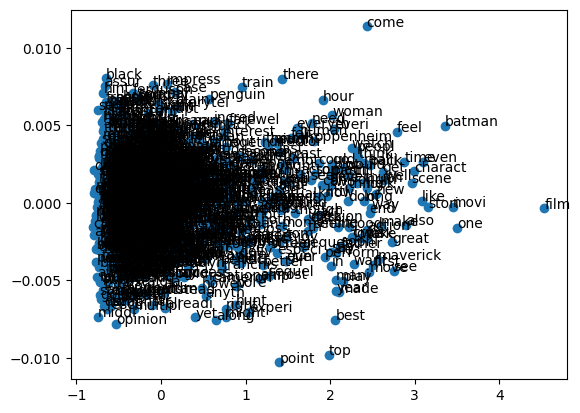

In [39]:
# Extracting word vectors from the Word2Vec model
X = model.wv[model.wv.index_to_key]

# Applying Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Creating a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])

# Extracting words from the model's vocabulary
words = list(model.wv.index_to_key)

# Annotating the scatter plot with words
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

# Displaying the scatter plot
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file

# Link:https://github.com/LavanyaPobbathi/Lavanya_INFO5731_Fall2023/blob/main/In_class_exercise/reviews_Final.csv

